In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
%load_ext line_profiler
%load_ext memory_profiler

In [3]:
module = fc.eightb.preselection.t8btag_minmass.Run2_UL18

In [47]:
def use_more_ttbar(ttbar):
    f = ttbar[0]
    return [f.replace("ntuple_0","ntuple_*")]

In [4]:
qcd = ObjIter([Tree(module.QCD_B_List)])

100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


In [48]:
ttbar = ObjIter([Tree(use_more_ttbar(module.TTJets))])


100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


In [49]:
bkg = qcd + ttbar

In [50]:
varinfo.jet_pt = dict(bins=(20,500,30))

In [51]:
class select_jets(ObjTransform):
    def __call__(self, t):
        mask = ak.ones_like(t.jet_pt) == 1

        if self.wp is not None:
            mask = mask & (t.jet_btag > jet_btagWP[self.wp])

        if self.flav is not None:
            mask = mask & (t.jet_hadronFlav == self.flav)

        return mask

100%|██████████| 2/2 [01:19<00:00, 39.64s/it]


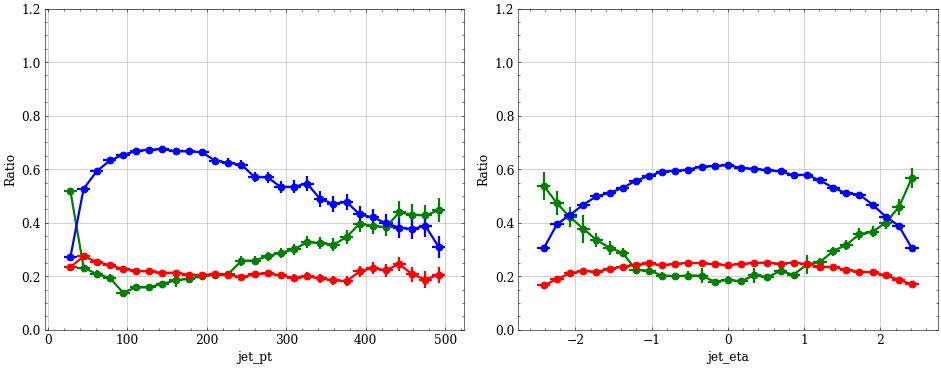

In [52]:
study.quick(
    bkg + bkg[[0,1,1]], stacked=False,
    h_color=['grey', 'grey', 'green','red','blue'],
    indices=[
        select_jets(wp=1),
        select_jets(wp=1),
        
        select_jets(wp=1, flav=0),
        select_jets(wp=1, flav=4),
        select_jets(wp=1, flav=5),
    ],
    # indices=[None, None] + [lambda t:t.jet_hadronFlav==0, lambda t:t.jet_hadronFlav==4, lambda t:t.jet_hadronFlav==5],
    varlist=['jet_pt', 'jet_eta'],

    histo=False,
    ratio=True, r_inv=True, r_group=[(0,2),(1,3),(1,4)], r_ylim=(0,1.2),
)

100%|██████████| 2/2 [00:48<00:00, 24.46s/it]


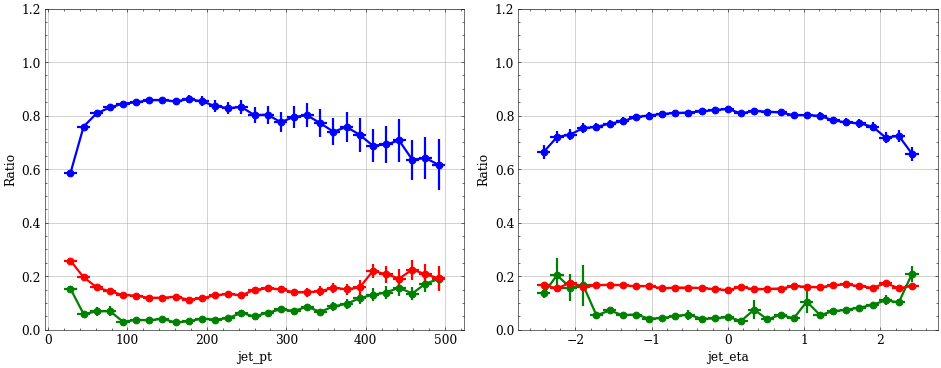

In [53]:
study.quick(
    bkg + bkg[[0,1,1]], stacked=False,
    h_color=['grey', 'grey', 'green','red','blue'],
    indices=[
        select_jets(wp=2),
        select_jets(wp=2),
        
        select_jets(wp=2, flav=0),
        select_jets(wp=2, flav=4),
        select_jets(wp=2, flav=5),
    ],
    # indices=[None, None] + [lambda t:t.jet_hadronFlav==0, lambda t:t.jet_hadronFlav==4, lambda t:t.jet_hadronFlav==5],
    varlist=['jet_pt', 'jet_eta'],

    histo=False,
    ratio=True, r_inv=True, r_group=[(0,2),(1,3),(1,4)], r_ylim=(0,1.2),
)

100%|██████████| 2/2 [00:48<00:00, 24.01s/it]


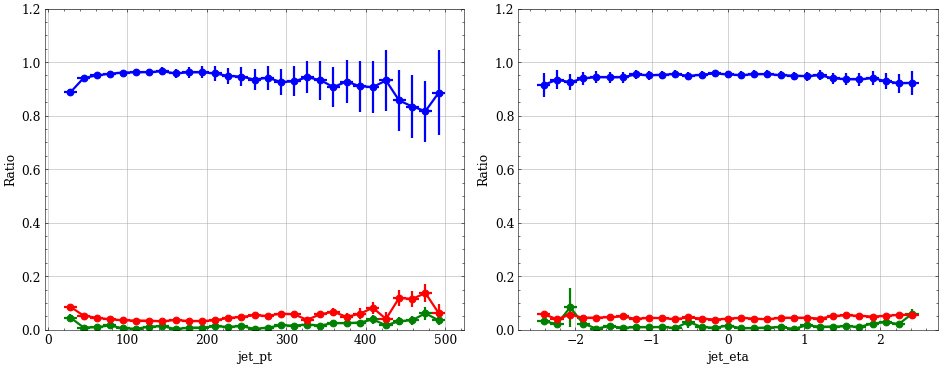

In [54]:
study.quick(
    bkg + bkg[[0,1,1]], stacked=False,
    h_color=['grey', 'grey', 'green','red','blue'],
    indices=[
        select_jets(wp=3),
        select_jets(wp=3),
        
        select_jets(wp=3, flav=0),
        select_jets(wp=3, flav=4),
        select_jets(wp=3, flav=5),
    ],
    # indices=[None, None] + [lambda t:t.jet_hadronFlav==0, lambda t:t.jet_hadronFlav==4, lambda t:t.jet_hadronFlav==5],
    varlist=['jet_pt', 'jet_eta'],

    histo=False,
    ratio=True, r_inv=True, r_group=[(0,2),(1,3),(1,4)], r_ylim=(0,1.2),
)

100%|██████████| 1/1 [00:30<00:00, 30.71s/it]


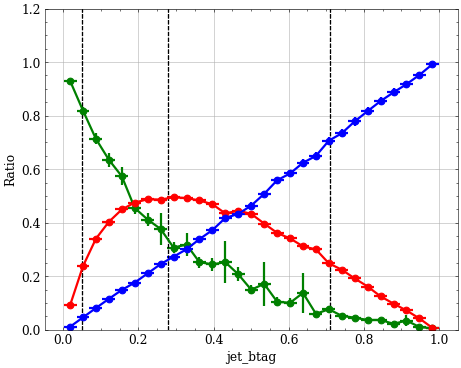

In [57]:
study.quick(
    bkg + bkg[[0,1,1]], stacked=False,
    h_color=['grey', 'grey', 'green','red','blue'],
    indices=[
        select_jets(wp=0),
        select_jets(wp=0),
        
        select_jets(wp=0, flav=0),
        select_jets(wp=0, flav=4),
        select_jets(wp=0, flav=5),
    ],
    # indices=[None, None] + [lambda t:t.jet_hadronFlav==0, lambda t:t.jet_hadronFlav==4, lambda t:t.jet_hadronFlav==5],
    varlist=['jet_btag'],

    histo=False,
    ratio=True, r_inv=True, r_group=[(0,2),(1,3),(1,4)], r_ylim=(0,1.2),
    r_exe=[
        lambda ax, **kwargs : ax.plot([jet_btagWP[1], jet_btagWP[1]],[0, 1.2,], 'k--'),
        lambda ax, **kwargs : ax.plot([jet_btagWP[2], jet_btagWP[2]],[0, 1.2,], 'k--'),
        lambda ax, **kwargs : ax.plot([jet_btagWP[3], jet_btagWP[3]],[0, 1.2,], 'k--'),
    ]
)